<a href="https://colab.research.google.com/github/sayandas96476/gemstone-identification-using-deep-learning-approach/blob/main/Custom%20ResNet%20(accuracy%20vs%20epoch%2C%20loss%20vs%20epoch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u /content/drive/MyDrive/test.zip -d /content
!unzip -u /content/drive/MyDrive/train.zip -d /content

Archive:  /content/drive/MyDrive/test.zip
Archive:  /content/drive/MyDrive/train.zip


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
from sklearn.metrics import confusion_matrix
import numpy as np 
import pandas as pd
from glob import glob 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
train_path = '/content/train'
test_path = '/content/test'
BATCH_SIZE = 64
IMG_SIZE = 224 
seed=123
input_shape = (IMG_SIZE,IMG_SIZE)  
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,\
                                   rotation_range=15, shear_range=10,\
                                   zoom_range=0.1, fill_mode='nearest', \
                                   height_shift_range=0.05, width_shift_range=0.1)


train_gen = train_datagen.flow_from_directory(subset='training',
    directory=train_path,
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    interpolation='nearest'
)

Found 543 images belonging to 87 classes.
Found 2313 images belonging to 87 classes.


In [ ]:
class_indices = train_gen.class_indices

In [ ]:
checkpoint_path = "/content/drive/MyDrive/vgg16/weights.ckpt"

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory=test_path,
                                            target_size = (224, 224),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 363 images belonging to 87 classes.


In [ ]:
from keras.models import load_model
#loading a model saved from Custom_ResNet.ipynb
model = load_model('/content/drive/MyDrive/CustomResNet/saved_models/model_1.h5')

history=model.fit(train_gen,
  validation_data=test_set,
  epochs=50)

Epoch 1/50
37/37 [==============================] - 31s 798ms/step - loss: 0.7554 - accuracy: 0.7687 - top-3 accuracy: 0.9460 - top-5 accuracy: 0.9762 - val_loss: 2.9403 - val_accuracy: 0.3554 - val_top-3 accuracy: 0.6364 - val_top-5 accuracy: 0.7658
Epoch 2/50
37/37 [==============================] - 29s 771ms/step - loss: 0.7581 - accuracy: 0.7415 - top-3 accuracy: 0.9481 - top-5 accuracy: 0.9836 - val_loss: 2.3093 - val_accuracy: 0.5096 - val_top-3 accuracy: 0.7300 - val_top-5 accuracy: 0.8402
Epoch 3/50
37/37 [==============================] - 30s 801ms/step - loss: 0.6140 - accuracy: 0.7955 - top-3 accuracy: 0.9589 - top-5 accuracy: 0.9875 - val_loss: 3.1771 - val_accuracy: 0.4050 - val_top-3 accuracy: 0.6281 - val_top-5 accuracy: 0.7410
Epoch 4/50
37/37 [==============================] - 29s 768ms/step - loss: 0.6065 - accuracy: 0.7895 - top-3 accuracy: 0.9633 - top-5 accuracy: 0.9896 - val_loss: 2.5157 - val_accuracy: 0.4408 - val_top-3 accuracy: 0.7218 - val_top-5 accuracy: 0.8

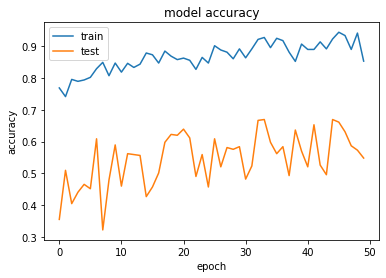

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

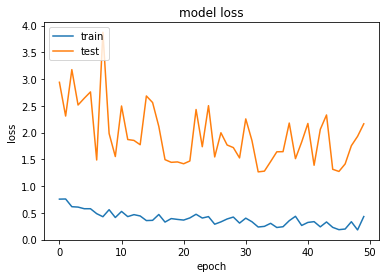

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()